In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from adl import DataProcessor
from adl import compare_results

# Post Descriptive Analysis

In [43]:
# Path to Wuerth Data
DATA_PATH = "../01_data/dataset_wuerth.csv"

### Identify Selected Individuals

#### Load Selected Individuals

In [44]:
# Load common dataframes
common_full = pd.read_csv("../01_data/data_out/common_full.csv")
common_remove = pd.read_csv("../01_data/data_out/common_remove.csv")
common_extract = pd.read_csv("../01_data/data_out/common_extract.csv")
common_both = pd.read_csv("../01_data/data_out/common_both.csv")

combined_condition = lambda df: (df["dunning_level_max"] > 2) & (
    df["dunning_level_current"] > 2
)

df_raw = pd.read_csv(DATA_PATH)
processor = DataProcessor(DATA_PATH, remove_multicollinearity=False)
df = processor.process_data(mode=None, scale=None)

No scaling applied


Create Factor Variable based on predictions

In [45]:
filtered_cust_ids_1 = common_remove.loc[common_remove["Count"] == 1, "cust_id"]
filtered_cust_ids_2 = common_remove.loc[common_remove["Count"] == 2, "cust_id"]
filtered_cust_ids_3 = common_remove.loc[common_remove["Count"] == 3, "cust_id"]

# Conditions
condition1 = (df["flag_new_orsyshelf"] == 0) & (
    ~df["cust_id"].isin(common_remove["cust_id"])
)
condition2 = df["flag_new_orsyshelf"] == 1
condition3 = (df["flag_new_orsyshelf"] == 0) & (df["cust_id"].isin(filtered_cust_ids_1))
condition4 = (df["flag_new_orsyshelf"] == 0) & (df["cust_id"].isin(filtered_cust_ids_2))
condition5 = (df["flag_new_orsyshelf"] == 0) & (df["cust_id"].isin(filtered_cust_ids_3))

values = ["1", "2", "3", "4", "5"]

df["orsy_status"] = np.select(
    [condition1, condition2, condition3, condition4, condition5], values, default="0"
)

In [46]:
factor_variable = ["orsy_status"]
variable_list = [
    "emp_count_lvl",
    "contr_margin",
    "sales_orsy_relevant",
    "orders_count",
    "diff_products_count",
    "diff_product_fields_count",
    "td_last_buy",
    "td_cust_since",
    "bo_visits_total",
    "eshop_logins_count",
    "count_buydays",
    "count_buyweeks",
    "count_buymonths",
]

grouped_descriptives = df.groupby(factor_variable)[variable_list].describe().T

grouped_descriptives

orsy_status                       1            2           3           4  \
emp_count_lvl   count  25623.000000  2740.000000  416.000000  122.000000   
                mean       0.417047     0.875547    1.057692    1.393443   
                std        0.626087     0.737204    0.751890    0.624002   
                min        0.000000     0.000000    0.000000    0.000000   
                25%        0.000000     0.000000    0.000000    1.000000   
...                             ...          ...         ...         ...   
count_buymonths min        1.000000     1.000000    3.000000   11.000000   
                25%        2.000000    12.000000   12.000000   13.000000   
                50%        4.000000    13.000000   13.000000   13.000000   
                75%        8.000000    14.000000   13.000000   14.000000   
                max       20.000000    21.000000   18.000000   20.000000   

orsy_status                    5  
emp_count_lvl   count  17.000000  
                mean    1.529412  
                std     0.514496  
                min     1.000000  
                25%     1.000000  
...                          ...  
count_buymonths min    10.000000  
                25%    14.000000  
                50%    14.000000  
                75%    15.000000  
                max    17.000000  

[104 rows x 5 columns]

In [47]:
df.groupby("orsy_status", as_index=False)[
    [
        "rev_salesrep",
        "rev_branch_office",
        "rev_internal_staff",
        "rev_ebusiness",
        "rev_others",
    ]
].describe().T

0            1             2  \
orsy_status                         1            2             3   
rev_salesrep       count      25623.0       2740.0         416.0   
                   mean    488.483364  8489.337836   6532.564663   
                   std    1790.331965  14654.19771   9371.436564   
                   min       -5810.12      -907.88      -5142.51   
                   25%            0.0     451.1125         299.0   
                   50%            0.0      3655.05       2930.36   
                   75%        163.445    10783.325      9619.845   
                   max       91298.22    212765.78      78105.88   
rev_branch_office  count      25623.0       2740.0         416.0   
                   mean    1216.27841   5735.71546   9556.164447   
                   std    2591.531348  9699.146305  14563.249112   
                   min        -264.72       -753.8           0.0   
                   25%         19.965       520.82       734.175   
                   50%         265.46     2624.405       3429.14   
                   75%       1210.485    6862.9425      12370.73   
                   max       48279.43    143189.17     110187.02   
rev_internal_staff count      25623.0       2740.0         416.0   
                   mean    171.537178  1756.550682   2247.278534   
                   std    1404.806623  6286.537328  13188.148097   
                   min        -1017.6     -1106.03      -3960.12   
                   25%            0.0          0.0           0.0   
                   50%            0.0       129.97        196.93   
                   75%            0.0       824.76      905.2675   
                   max       140486.2    103670.22     216934.19   
rev_ebusiness      count      25623.0       2740.0         416.0   
                   mean    292.434832  4788.570047   5074.003053   
                   std    1201.174396  11748.24099  14990.185988   
                   min         -333.6     -1519.49     -14524.76   
                   25%            0.0          0.0           0.0   
                   50%            0.0       909.82       1134.92   
                   75%            0.0    5154.0675     5012.9025   
                   max       30420.12    325461.46     251133.78   
rev_others         count      25623.0       2740.0         416.0   
                   mean     -2.456594   -31.809927    -35.991154   
                   std      34.130009   254.834976    164.513836   
                   min        -2322.6     -8482.98      -2009.34   
                   25%            0.0          0.0           0.0   
                   50%            0.0          0.0           0.0   
                   75%            0.0          0.0           0.0   
                   max        1032.52      3747.05           0.0   

                                     3             4  
orsy_status                          4             5  
rev_salesrep       count         122.0          17.0  
                   mean   14113.434016   8288.399412  
                   std     18714.88797     8084.3641  
                   min             0.0        455.22  
                   25%       3564.7525        3602.7  
                   50%        7858.925       5570.79  
                   75%      15964.8925       9877.08  
                   max       137493.36       32515.0  
rev_branch_office  count         122.0          17.0  
                   mean   15578.784836   8995.236471  
                   std    24257.437119  10357.132583  
                   min             0.0        103.94  
                   25%       2291.7825       1291.37  
                   50%        8326.455       4858.03  
                   75%       19078.885      11920.49  
                   max       159537.58      31180.27  
rev_internal_staff count         122.0          17.0  
                   mean    3844.481557   2965.072941  
                   std    12670.233397   4528.478928  
                   min  

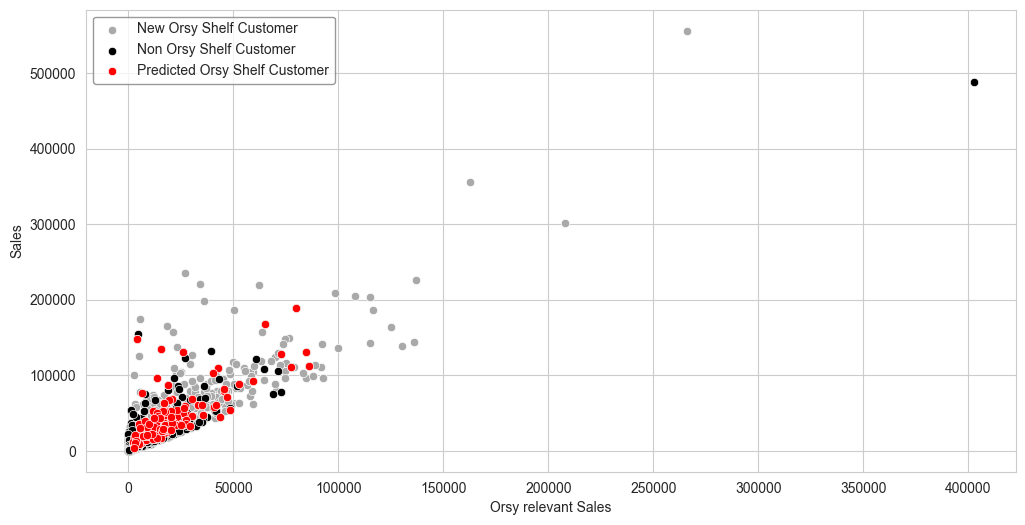

In [48]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Scatter plot for New Orsy Shelf
sns.scatterplot(
    x="sales_orsy_relevant",
    y="sales",
    data=df[df["flag_new_orsyshelf"] == 1],
    color="darkgrey",
    label="New Orsy Shelf Customer",
)

# Scatter plot for Non Orsy Shelf
sns.scatterplot(
    x="sales_orsy_relevant",
    y="sales",
    data=df[df["flag_new_orsyshelf"] == 0],
    color="black",
    label="Non Orsy Shelf Customer",
)

# Scatter plot for New Orsy Shelf
sns.scatterplot(
    x="sales_orsy_relevant",
    y="sales",
    data=df[df["orsy_status"].astype(int) > 3],
    color="red",
    label="Predicted Orsy Shelf Customer",
)

# Set x-axis label
plt.xlabel("Orsy relevant Sales")

# Set y-axis label
plt.ylabel("Sales")

# Set plot title
# plt.title("Scatterplot of Sales and Orsy relevant Sales for Orsy Shelf and Non Orsy Shelf Customers", fontsize=16)

# Show legend with a border
legend = plt.legend(loc="upper left")
legend.get_frame().set_linewidth(1)
legend.get_frame().set_edgecolor("grey")

# Export the plot
plt.savefig(f"../03_report/graphs/sales_scatter_post.png", dpi=1440)

# Show the plot
plt.show()

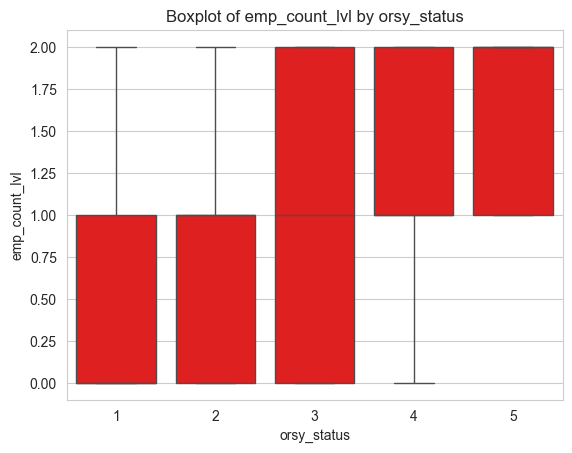

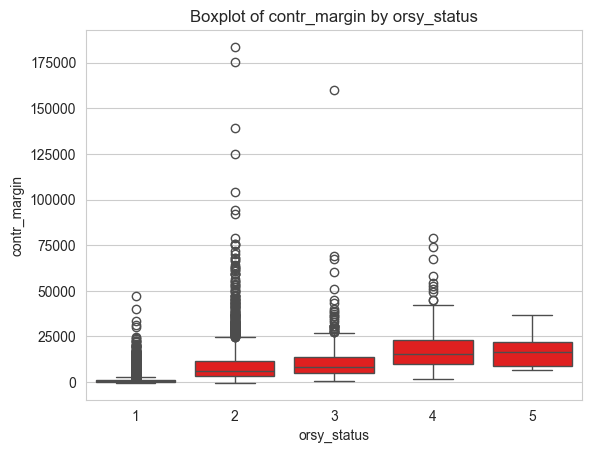

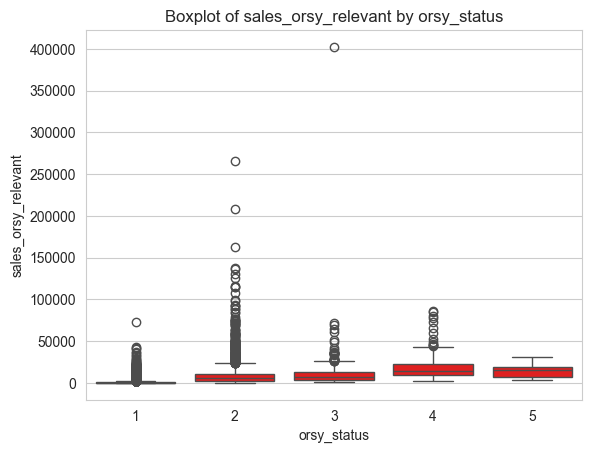

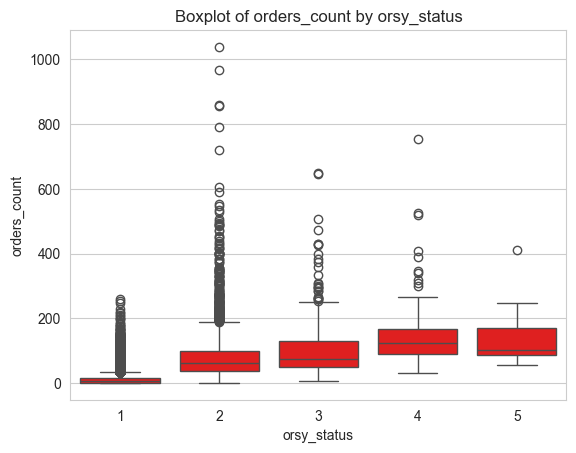

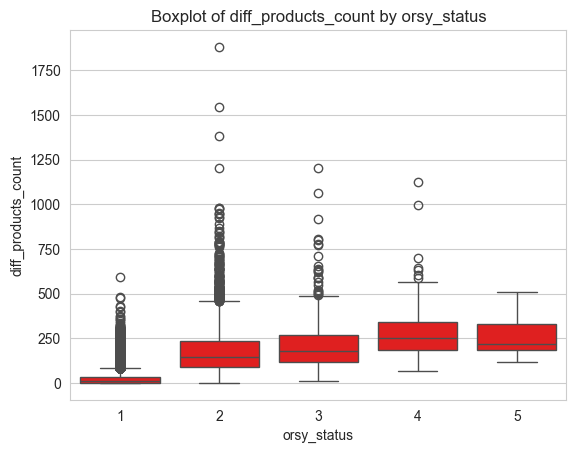

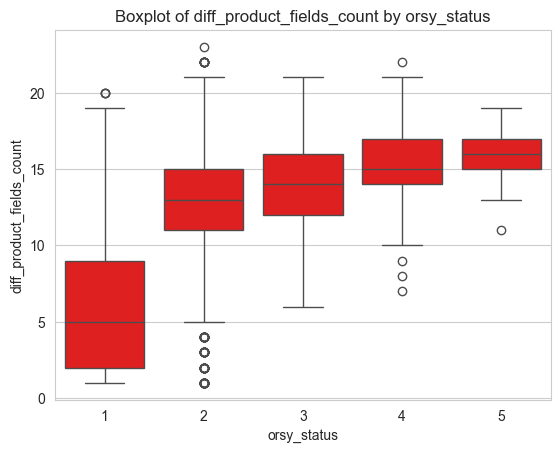

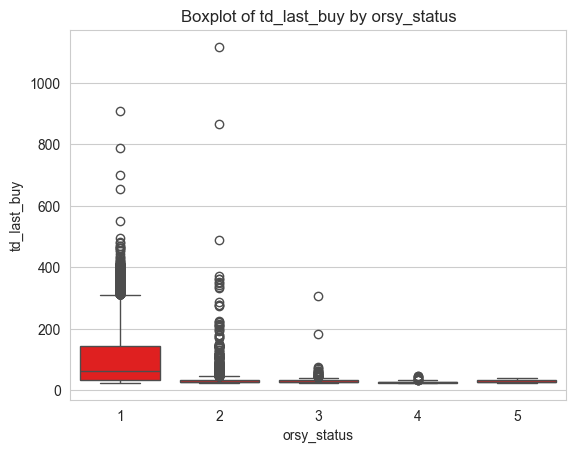

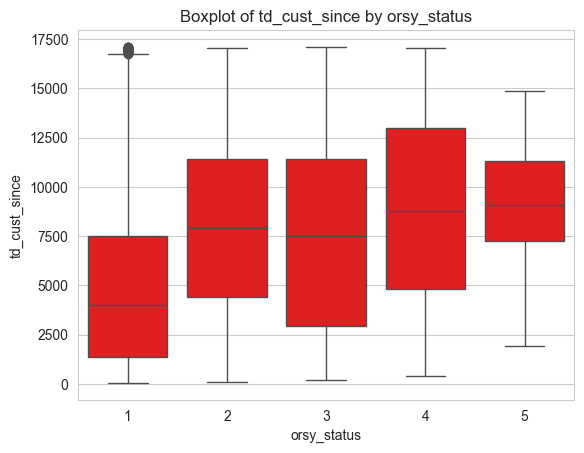

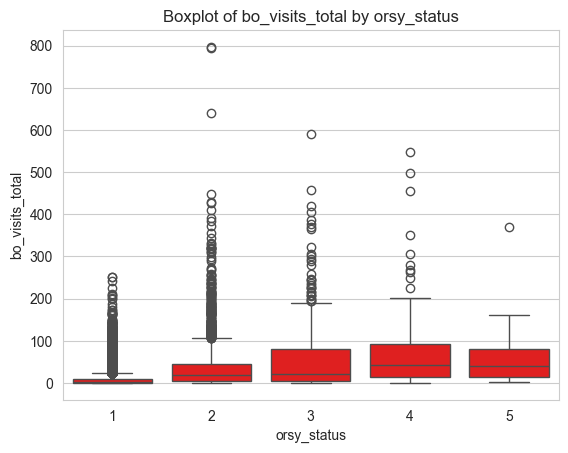

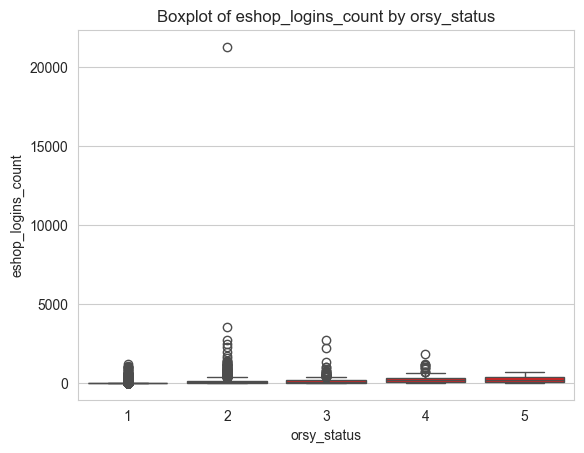

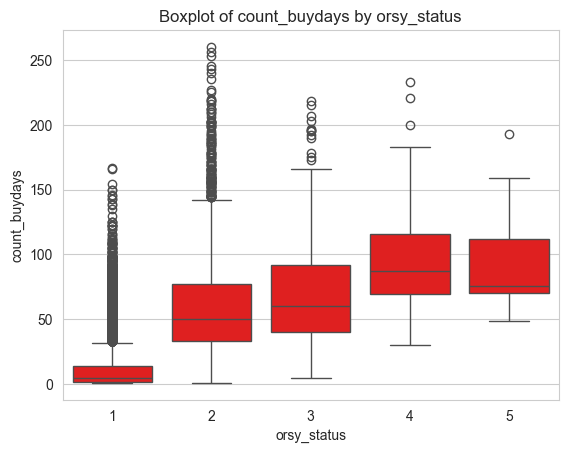

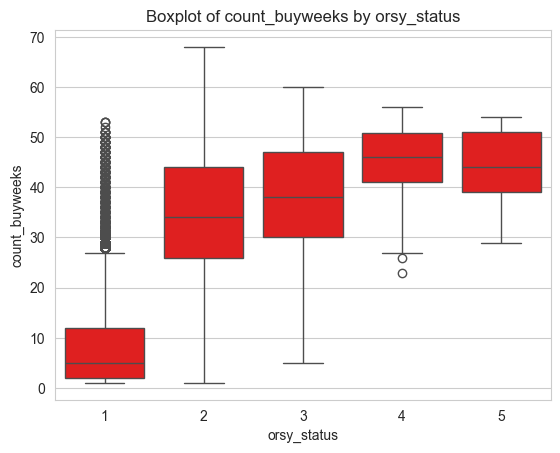

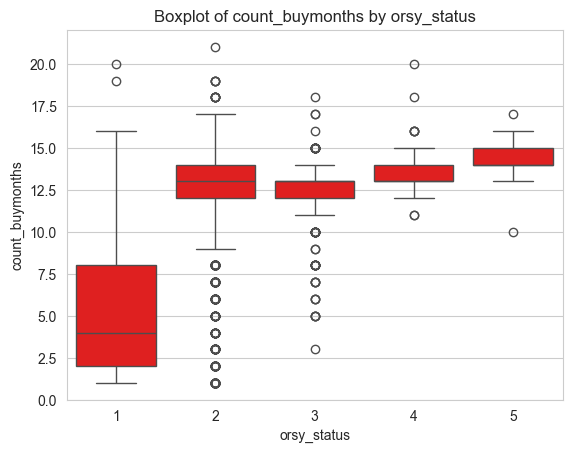

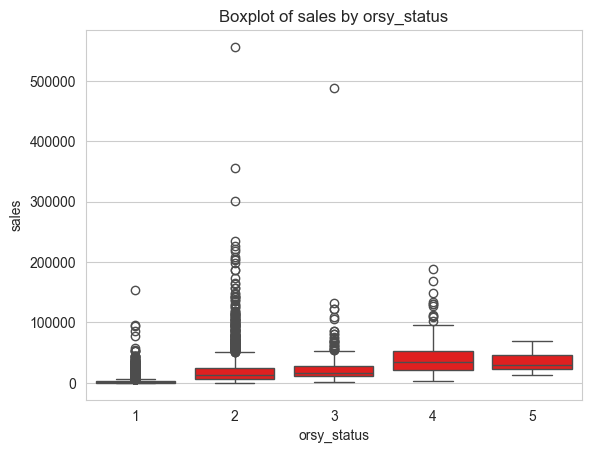

In [49]:
# Remove flag variables and add sales
variable_list.append("sales")
items_to_remove = [
    "flag_app",
    "flag_eshop",
    "flag_red",
    "flag_new_orsyshelf",
    "flag_orsyonline",
]
variable_list = list(filter(lambda x: x not in items_to_remove, variable_list))

# Boxplots
for variable in variable_list:
    if variable in df.columns and df[variable].dtype in ["int64", "float64"]:
        sns.boxplot(
            x="orsy_status",
            y=variable,
            data=df,
            order=["1", "2", "3", "4", "5"],
            color="red",
        )

        # select variables for export
        if variable in ["orders_count"]:
            plt.savefig(f"../03_report/graphs/{variable}_boxplot.png", dpi=1440)

        plt.title(f"Boxplot of {variable} by orsy_status")
        plt.show()

Boxplot preparation for presentation

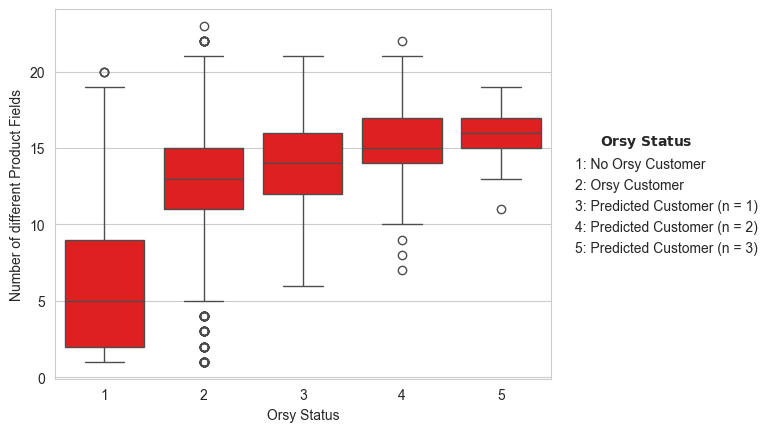

In [50]:
# Boxplot Product Fields

bp = sns.boxplot(
    x="orsy_status",
    y="diff_product_fields_count",
    data=df,
    order=["1", "2", "3", "4", "5"],
    color="red",
)
bp.set(xlabel="Orsy Status", ylabel="Number of different Product Fields")

# Define legend labels
legend_labels = {
    "1": "No Orsy Customer",
    "2": "Orsy Customer",
    "3": "Predicted Customer (n = 1)",
    "4": "Predicted Customer (n = 2)",
    "5": "Predicted Customer (n = 3)",
}

# Create custom legend outside the boxplot
handles = [
    plt.Line2D([0], [0], color="red", label=f"{order}")
    for order in legend_labels.keys()
]
legend = plt.legend(
    handles=handles,
    title="$\\bf{Orsy\ Status}$",
    loc="center left",
    bbox_to_anchor=(0.95, 0.5),
    borderaxespad=0.3,
    frameon=False,
)

# Remove lines from the legend
for line in legend.get_lines():
    line.set_linestyle("None")

# Add labels to the legend
for order, label in legend_labels.items():
    legend.get_texts()[int(order) - 1].set_text(f"{order}: {label}")

plt.savefig(
    f"../03_report/graphs/diff_product_fields_boxplot.png",
    bbox_inches="tight",
    dpi=1440,
)

plt.show()

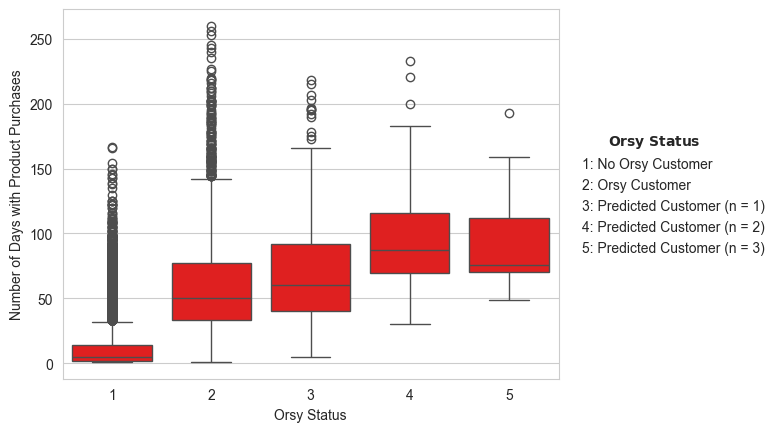

In [51]:
# Boxplot Count Days
bp = sns.boxplot(
    x="orsy_status",
    y="count_buydays",
    data=df,
    order=["1", "2", "3", "4", "5"],
    color="red",
)
bp.set(xlabel="Orsy Status", ylabel="Number of Days with Product Purchases")

# Define legend labels
legend_labels = {
    "1": "No Orsy Customer",
    "2": "Orsy Customer",
    "3": "Predicted Customer (n = 1)",
    "4": "Predicted Customer (n = 2)",
    "5": "Predicted Customer (n = 3)",
}

# Create custom legend outside the boxplot
handles = [
    plt.Line2D([0], [0], color="red", label=f"{order}")
    for order in legend_labels.keys()
]
legend = plt.legend(
    handles=handles,
    title="$\\bf{Orsy\ Status}$",
    loc="center left",
    bbox_to_anchor=(0.95, 0.5),
    borderaxespad=0.3,
    frameon=False,
)

# Remove lines from the legend
for line in legend.get_lines():
    line.set_linestyle("None")

# Add labels to the legend
for order, label in legend_labels.items():
    legend.get_texts()[int(order) - 1].set_text(f"{order}: {label}")

plt.savefig(
    f"../03_report/graphs/count_buydays_boxplot.png", bbox_inches="tight", dpi=1440
)

plt.show()

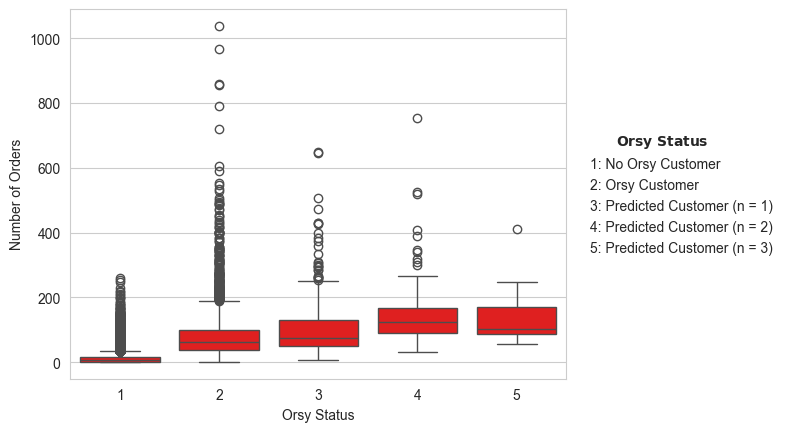

In [52]:
# Boxplot Orders Count
bp = sns.boxplot(
    x="orsy_status",
    y="orders_count",
    data=df,
    order=["1", "2", "3", "4", "5"],
    color="red",
)
bp.set(xlabel="Orsy Status", ylabel="Number of Orders")

# Define legend labels
legend_labels = {
    "1": "No Orsy Customer",
    "2": "Orsy Customer",
    "3": "Predicted Customer (n = 1)",
    "4": "Predicted Customer (n = 2)",
    "5": "Predicted Customer (n = 3)",
}

# Create custom legend outside the boxplot
handles = [
    plt.Line2D([0], [0], color="red", label=f"{order}")
    for order in legend_labels.keys()
]
legend = plt.legend(
    handles=handles,
    title="$\\bf{Orsy\ Status}$",
    loc="center left",
    bbox_to_anchor=(0.95, 0.5),
    borderaxespad=0.3,
    frameon=False,
)

# Remove lines from the legend
for line in legend.get_lines():
    line.set_linestyle("None")

# Add labels to the legend
for order, label in legend_labels.items():
    legend.get_texts()[int(order) - 1].set_text(f"{order}: {label}")

plt.savefig(
    f"../03_report/graphs/orders_count_boxplot.png", bbox_inches="tight", dpi=1440
)

plt.show()

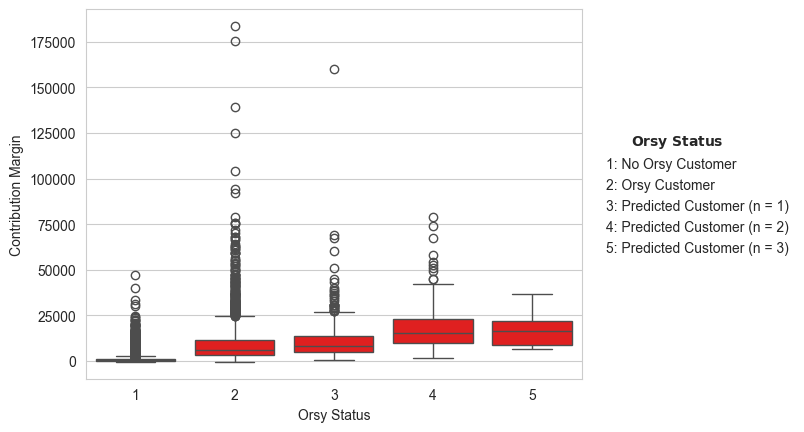

In [53]:
# Boxplot Contribution Margin
bp = sns.boxplot(
    x="orsy_status",
    y="contr_margin",
    data=df,
    order=["1", "2", "3", "4", "5"],
    color="red",
)
bp.set(xlabel="Orsy Status", ylabel="Contribution Margin")

# Define legend labels
legend_labels = {
    "1": "No Orsy Customer",
    "2": "Orsy Customer",
    "3": "Predicted Customer (n = 1)",
    "4": "Predicted Customer (n = 2)",
    "5": "Predicted Customer (n = 3)",
}

# Create custom legend outside the boxplot
handles = [
    plt.Line2D([0], [0], color="red", label=f"{order}")
    for order in legend_labels.keys()
]
legend = plt.legend(
    handles=handles,
    title="$\\bf{Orsy\ Status}$",
    loc="center left",
    bbox_to_anchor=(0.95, 0.5),
    borderaxespad=0.3,
    frameon=False,
)

# Remove lines from the legend
for line in legend.get_lines():
    line.set_linestyle("None")

# Add labels to the legend
for order, label in legend_labels.items():
    legend.get_texts()[int(order) - 1].set_text(f"{order}: {label}")

plt.savefig(
    f"../03_report/graphs/contr_margin_boxplot.png", bbox_inches="tight", dpi=1440
)

plt.show()

In [54]:
subset1 = df.loc[condition1]
subset2 = df.loc[condition2]
subset3 = df.loc[condition3]
subset4 = df.loc[condition4]
subset5 = df.loc[condition5]

correlation_subset1 = subset1[variable_list].corr()
filtered_correlation_subset1 = correlation_subset1[correlation_subset1 > 0.2]
correlation_subset2 = subset2[variable_list].corr()
filtered_correlation_subset2 = correlation_subset2[correlation_subset2 > 0.2]
correlation_subset3 = subset3[variable_list].corr()
filtered_correlation_subset3 = correlation_subset3[correlation_subset3 > 0.2]
correlation_subset4 = subset4[variable_list].corr()
filtered_correlation_subset4 = correlation_subset4[correlation_subset4 > 0.2]
correlation_subset5 = subset5[variable_list].corr()
filtered_correlation_subset5 = correlation_subset5[correlation_subset5 > 0.2]

# print("\nFiltered Correlation for Subset 1:")
# print(filtered_correlation_subset1)

# print("\nFiltered Correlation for Subset 2:")
# print(filtered_correlation_subset2)

# print("\nFiltered Correlation for Subset 3:")
# print(filtered_correlation_subset3)

# print("\nFiltered Correlation for Subset 4:")
# print(filtered_correlation_subset4)

# print("\nFiltered Correlation for Subset 5:")
# print(filtered_correlation_subset5)

## Bar Chart Customer Contact Points (revenue)

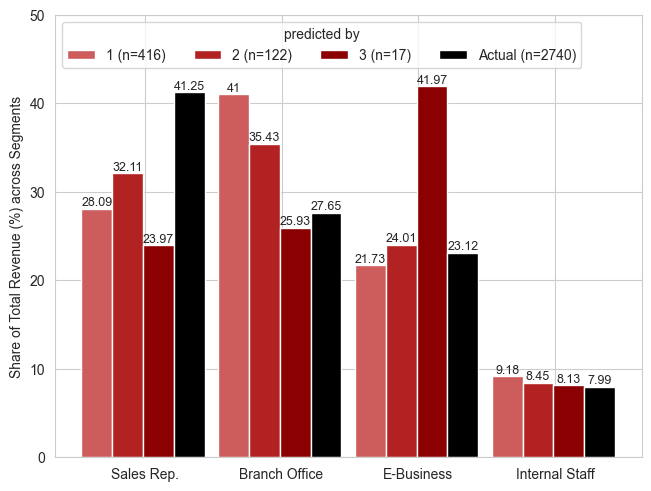

In [55]:
# defining contact points
contact_points = ("Sales Rep.", "Branch Office", "E-Business", "Internal Staff")

# creating lists of the revenue for each prediction class and the actual new orsy customers
sales_ccp_1 = df.loc[df["cust_id"].isin(filtered_cust_ids_1)][
    ["rev_salesrep", "rev_branch_office", "rev_ebusiness", "rev_internal_staff"]
]
sales_ccp_2 = df.loc[df["cust_id"].isin(filtered_cust_ids_2)][
    ["rev_salesrep", "rev_branch_office", "rev_ebusiness", "rev_internal_staff"]
]
sales_ccp_3 = df.loc[df["cust_id"].isin(filtered_cust_ids_3)][
    ["rev_salesrep", "rev_branch_office", "rev_ebusiness", "rev_internal_staff"]
]
sales_ccp_actual = df[df["orsy_status"].astype(int) == 2][
    ["rev_salesrep", "rev_branch_office", "rev_ebusiness", "rev_internal_staff"]
]

# sums of all sales for each prediction class and the actual new orsy customers
sales_sum_1 = sales_ccp_1.where(sales_ccp_1 > 1000).sum().sum()
sales_sum_2 = sales_ccp_2.where(sales_ccp_2 > 1000).sum().sum()
sales_sum_3 = sales_ccp_3.where(sales_ccp_3 > 1000).sum().sum()
sales_sum_actual = sales_ccp_actual.where(sales_ccp_actual > 1000).sum().sum()

# creating dict with the percentage of sales made in each CCP with respect to each prediction class and the actual new orsy customers
sales_ccp_share = {
    "1 (n="
    + str(len(filtered_cust_ids_1))
    + ")": round(sales_ccp_1.where(sales_ccp_1 > 1000).sum() / sales_sum_1 * 100, 2),
    "2 (n="
    + str(len(filtered_cust_ids_2))
    + ")": round(sales_ccp_2.where(sales_ccp_2 > 1000).sum() / sales_sum_2 * 100, 2),
    "3 (n="
    + str(len(filtered_cust_ids_3))
    + ")": round(sales_ccp_3.where(sales_ccp_3 > 1000).sum() / sales_sum_3 * 100, 2),
    "Actual (n="
    + str(len(df[df["orsy_status"].astype(int) == 2]))
    + ")": round(
        sales_ccp_actual.where(sales_ccp_actual > 1000).sum() / sales_sum_actual * 100,
        2,
    ),
}

# the label locations
x = np.arange(len(contact_points)) * 2
# the width of the bars
width = 0.45
multiplier = 0

# initializing subplot
fig, ax = plt.subplots(layout="constrained")
# defining custom colors
colors = ["indianred", "firebrick", "darkred", "black"]

# drawing bar chart for each prediction class
for (attribute, measurement), color in zip(sales_ccp_share.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, fontsize=9)
    multiplier += 1

# Adding text for labels, title and custom x-axis tick labels, legend and y-limits
ax.set_ylabel("Share of Total Revenue (%) across Segments")
# ax.set_title('Revenue Share Among Predicted Customers Across Contact Points')
ax.set_xticks(x + width + 0.25, contact_points)
ax.legend(loc="upper left", ncols=4, title="predicted by")
ax.set_ylim(0, 50)

plt.savefig(f"../03_report/graphs/avg_rev_ccp_bars.png", dpi=1440)

plt.show()

## Bar Chart Customer Contact Points (Most Used)

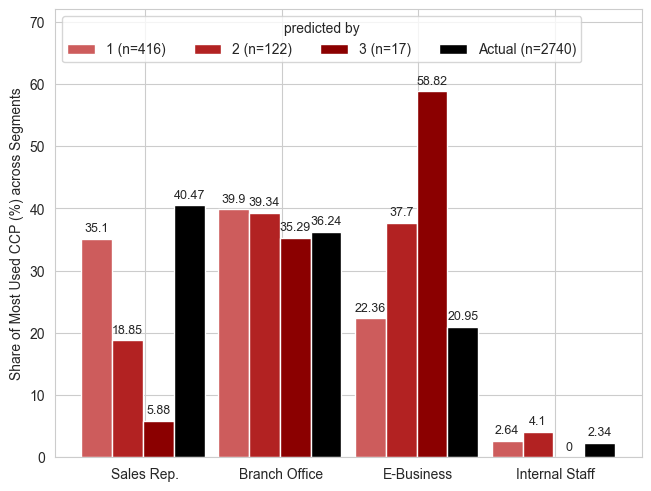

In [56]:
# defining contact points
contact_points = ("Sales Rep.", "Branch Office", "E-Business", "Internal Staff")

# creating lists of the counts of most used CCPs for each prediction class and the actual new orsy customers
ccp_counts_1 = pd.DataFrame(
    df_raw.loc[df_raw["cust_id"].isin(filtered_cust_ids_1)]["ccp_most_used"]
    .value_counts()
    .sort_index()
)
ccp_counts_2 = pd.DataFrame(
    df_raw.loc[df_raw["cust_id"].isin(filtered_cust_ids_2)]["ccp_most_used"]
    .value_counts()
    .sort_index()
)
ccp_counts_3 = pd.DataFrame(
    df_raw.loc[df_raw["cust_id"].isin(filtered_cust_ids_3)]["ccp_most_used"]
    .value_counts()
    .sort_index()
)
ccp_counts_3.loc[len(ccp_counts_3) + 1] = {"count": 0}
ccp_counts_actual = pd.DataFrame(
    df_raw.loc[
        df_raw["cust_id"].isin(df[df["orsy_status"].astype(int) == 2]["cust_id"])
    ]["ccp_most_used"]
    .value_counts()
    .sort_index()
)

# creating dict with the percentage of customers having the respective CCP as the most used, inside their each prediction class and the actual new orsy customers
ccp_share = {
    "1 (n="
    + str(len(filtered_cust_ids_1))
    + ")": round(ccp_counts_1["count"] / len(filtered_cust_ids_1) * 100, 2),
    "2 (n="
    + str(len(filtered_cust_ids_2))
    + ")": round(ccp_counts_2["count"] / len(filtered_cust_ids_2) * 100, 2),
    "3 (n="
    + str(len(filtered_cust_ids_3))
    + ")": round(ccp_counts_3["count"] / len(filtered_cust_ids_3) * 100, 2),
    "Actual (n="
    + str(len(df[df["orsy_status"].astype(int) == 2]))
    + ")": round(
        ccp_counts_actual["count"] / len(df[df["orsy_status"].astype(int) == 2]) * 100,
        2,
    ),
}

# the label locations
x = np.arange(len(contact_points)) * 2
# the width of the bars
width = 0.45
multiplier = 0

# initializing subplot
fig, ax = plt.subplots(layout="constrained")
# defining custom colors
colors = ["indianred", "firebrick", "darkred", "black"]

# drawing bar chart for each prediction class
for (attribute, measurement), color in zip(ccp_share.items(), colors):
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3, fontsize=9)
    multiplier += 1

# Adding text for labels, title and custom x-axis tick labels, legend and y-limits
ax.set_ylabel("Share of Most Used CCP (%) across Segments")
# ax.set_title('Most Used CCP Among predicted Customers')
ax.set_xticks(x + width + 0.25, contact_points)
ax.legend(loc="upper left", ncols=4, title="predicted by")
ax.set_ylim(0, 72)

plt.savefig(f"../03_report/graphs/most_ccp_bars.png", dpi=1440)

plt.show()

### Analysing Contribution Margin in respect to ccp_most_used

In [57]:
costs = (
    df_raw.loc[
        df_raw["cust_id"].isin(df[df["orsy_status"].astype(int) > 3]["cust_id"])
    ][["ccp_most_used", "contr_margin", "sales", "sales_orsy_relevant"]]
    .groupby("ccp_most_used")
    .sum()
)
costs["costs%"] = (costs["sales"] - costs["contr_margin"]) / costs["sales"] * 100
costs["orsy%"] = costs["sales_orsy_relevant"] / costs["sales"] * 100
costs["CCP"] = ["Sales Rep.", "Branch Office", "E-Business", "Internal Staff"]
costs

,contr_margin,sales,sales_orsy_relevant,costs%,orsy%,CCP
ccp_most_used,,,,,,
1,474840.81,1046793.79,455141.28,54.638553,43.479555,Sales Rep.
2,1209613.09,2668835.76,1051626.55,54.676376,39.403944,Branch Office
3,854634.25,1956702.32,949637.62,56.322725,48.532555,E-Business
4,114924.57,291896.00,227865.08,60.628248,78.063790,Internal Staff


In [58]:
costs = (
    df_raw.loc[df_raw["cust_id"].isin(df[df["flag_new_orsyshelf"] == 1]["cust_id"])][
        ["ccp_most_used", "contr_margin", "sales", "sales_orsy_relevant"]
    ]
    .groupby("ccp_most_used")
    .sum()
)
costs["costs%"] = (costs["sales"] - costs["contr_margin"]) / costs["sales"] * 100
costs["orsy%"] = costs["sales_orsy_relevant"] / costs["sales"] * 100
costs["CCP"] = ["Sales Rep.", "Branch Office", "E-Business", "Internal Staff"]
costs

,contr_margin,sales,sales_orsy_relevant,costs%,orsy%,CCP
ccp_most_used,,,,,,
1,11193727.45,24468267.30,11091424.40,54.252063,45.329832,Sales Rep.
2,8341750.72,17413934.28,7725720.65,52.097265,44.365165,Branch Office
3,5823073.47,12753585.23,6036895.90,54.341674,47.334893,E-Business
4,954272.42,2187330.82,1180931.64,56.372744,53.989622,Internal Staff


In [59]:
costs = (
    df_raw.loc[
        df_raw["cust_id"].isin(
            df[
                (df["flag_new_orsyshelf"] == 0)
                & (~df["cust_id"].isin(common_full["cust_id"]))
            ]["cust_id"]
        )
    ][["ccp_most_used", "contr_margin", "sales", "sales_orsy_relevant"]]
    .groupby("ccp_most_used")
    .sum()
)
costs["costs%"] = (costs["sales"] - costs["contr_margin"]) / costs["sales"] * 100
costs["orsy%"] = costs["sales_orsy_relevant"] / costs["sales"] * 100
costs["CCP"] = ["Sales Rep.", "Branch Office", "E-Business", "Internal Staff", "Others"]
costs

,contr_margin,sales,sales_orsy_relevant,costs%,orsy%,CCP
ccp_most_used,,,,,,
1,4454306.99,10566365.37,4198699.04,57.844473,39.736455,Sales Rep.
2,17938275.17,34577327.46,15172085.55,48.121279,43.878711,Branch Office
3,3598087.41,7084985.30,3272806.69,49.215316,46.193557,E-Business
4,1213681.28,2654803.57,1352109.40,54.283575,50.930676,Internal Staff
5,486.74,1030.24,418.29,52.754698,40.601219,Others


## Mean share of orsy relevant sales for each prediction class/orsy status

Text(0, 0.5, 'Orsy Status')

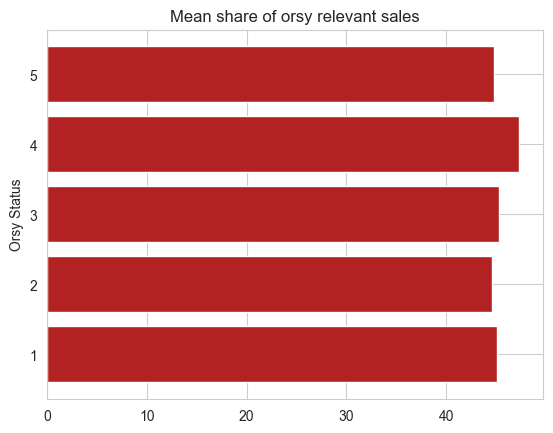

In [60]:
# calculate mean sales_relevant_share for each orsy status
orsy_shares = (
    df[["orsy_status", "sales_relevant_share"]]
    .groupby(by="orsy_status", group_keys=False)
    .mean()
)

# bar plot the mean shares
plt.barh(orsy_shares.index, orsy_shares["sales_relevant_share"], color="firebrick")
plt.title("Mean share of orsy relevant sales")
plt.ylabel("Orsy Status")

Text(0, 0.5, 'Orsy Status')

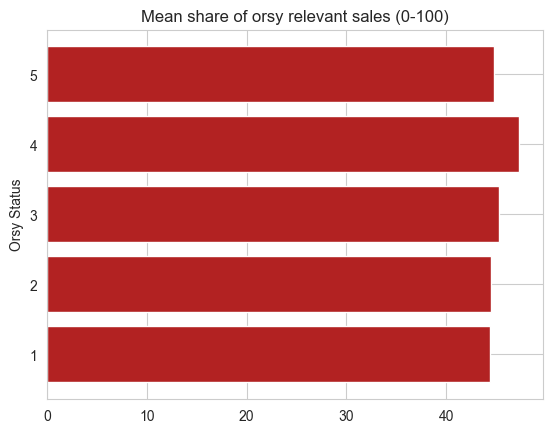

In [61]:
# filtering out orsy shares below 0 and above 100 and calculate mean sales_relevant_share for each orsy status
orsy_shares = (
    df[(df["sales_relevant_share"] >= 0) & (df["sales_relevant_share"] <= 100)][
        ["orsy_status", "sales_relevant_share"]
    ]
    .groupby(by="orsy_status", group_keys=False)
    .mean()
)

# bar plot the mean shares
plt.barh(orsy_shares.index, orsy_shares["sales_relevant_share"], color="firebrick")
plt.title("Mean share of orsy relevant sales (0-100)")
plt.ylabel("Orsy Status")

In [62]:
# Filter data for New Orsy Shelf customers
for status_level in np.sort(df["orsy_status"].unique()):
    orsy_data = df[df["orsy_status"] == status_level]
    # Calculate the sum of sales for Orsy relevant sales for New Orsy Shelf customers
    orsy_relevant_sales = orsy_data["sales_orsy_relevant"].sum()
    # Calculate the total sales for New Orsy Shelf customers
    total_sales = orsy_data["sales"].sum()
    # Calculate the ratio of Orsy relevant sales to total sales for New Orsy Shelf customers
    ratio_new = orsy_relevant_sales / total_sales
    # Print the result
    print(
        f"Ratio of Orsy relevant sales for Customers with status {status_level}",
        ratio_new,
    )

Ratio of Orsy relevant sales for Customers with status 1 0.4395661716817748
Ratio of Orsy relevant sales for Customers with status 2 0.45817571572762017
Ratio of Orsy relevant sales for Customers with status 3 0.47289203604223995
Ratio of Orsy relevant sales for Customers with status 4 0.4507254412210243
Ratio of Orsy relevant sales for Customers with status 5 0.44404233293829914
